In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import (
    Binarizer,
    StandardScaler,
    LabelBinarizer,
    OneHotEncoder,
)
from sklearn.linear_model import LogisticRegression
from sklearnex import patch_sklearn

patch_sklearn()
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
# from xgboost import XGBRFClassifier, XGBClassifier
from sklearn.neural_network import MLPClassifier
# import dtale
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# sns.set()
pd.options.display.max_columns = 50
pd.options.plotting.backend = "matplotlib"
from sklearn import set_config

set_config(display="diagram")
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
    MinMaxScaler,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import warnings
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

warnings.filterwarnings("ignore")
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    AdaBoostClassifier,
    HistGradientBoostingClassifier,
    GradientBoostingClassifier,
)
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    # StratifiedGroupKFold,

    StratifiedKFold,
)
import sigopt

from sklearn.naive_bayes import BernoulliNB, CategoricalNB, MultinomialNB, ComplementNB, GaussianNB
from sklearn.model_selection import cross_validate
nb_est = [CategoricalNB(), MultinomialNB(), ComplementNB(), GaussianNB()]
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.tree import export_graphviz, plot_tree
# import seaborn as sns
# import matplotlib.pyplot as plt
from tqdm import tqdm
# from xgboost import XGBClassifier
from joblib import parallel_backend
# from autosklearn.automl import AutoMLClassifier
import sklearn.metrics
dtype_info = {
    "v_1": "Binary",
    "v_26": "Binary",
    "v_11": "Binary",
    "v_14": "Binary",
    "v_30": "Binary",
    "v_28": "Binary",
    "v_9": "Binary",
    "v_27": "Binary",
    "v_32": "Nominal",
    "v_4": "Nominal",
    "v_3": "Nominal",
    "v_20": "Nominal",
    "v_21": "Nominal",
    "v_18": "Nominal",
    "v_25": "Nominal",
    "v_12": "Nominal",
    "v_31": "Ordinal",
    "v_15": "Ordinal",
    "v_19": "Ordinal",
    "v_13": "Ordinal",
    "v_33": "Ordinal",
    "v_17": "Ordinal",
    "v_29": "Ordinal",
    "v_23": "Ordinal",
    "v_6": "Ordinal",
    "v_24": "Ordinal",
    "v_10": "Ordinal",
    "v_5": "Ordinal",
    "v_22": "Ordinal",
    "v_0": "Ordinal",
    "v_16": "Ratio",
    "v_2": "Ratio",
    "v_8": "Ratio",
    "v_7": "Ratio",
    "v_39": "Ratio",
    "v_37": "Ratio",
    "v_38": "Ratio",
    "v_34": "Ratio",
    "v_40": "Ratio",
    "v_36": "Ratio",
    "v_35": "Ratio",
}
data = pd.read_csv('../data/train.csv',index_col=0,)
ordinal = [i for i in dtype_info if dtype_info[i] == "Ordinal"]
nominal = [i for i in dtype_info if dtype_info[i] == "Nominal"]
binary = [i for i in dtype_info if dtype_info[i] == "Binary"]
ratio = [i for i in dtype_info if dtype_info[i] == "Ratio"]
def categorise_data(data):
    ordinal_data = data.loc[:, ordinal]
    nominal_data = data.loc[:, nominal]
    binary_data = data.loc[:, binary]
    ratio_data = data.loc[:, ratio]
    return ordinal_data, nominal_data, binary_data, ratio_data
ordinal_data, nominal_data, binary_data, ratio_data = categorise_data(data)
def gen_train_test(data, p):
    Y = data.label
    X_2= Y_2 = Y[Y==2].index
    X_0= Y_0 = Y[Y==0].index
    X_1= Y_1 = Y[Y==1].index
    train_size = int(p*Y_2.shape[0])
    test_size = int((1-p)*Y_2.shape[0])
    
    train_idx_2 = np.random.choice(Y_2,(train_size,))
    train_idx_1 = np.random.choice(Y_1,(train_size,))
    train_idx_0 = np.random.choice(Y_0,(train_size,))
    train_idx = np.r_[train_idx_0, train_idx_1,train_idx_2]
    # train_idx.shape

    test_idx_2 = np.random.choice(np.setdiff1d(Y_2, train_idx_2),(test_size,))
    test_idx_1 = np.random.choice(np.setdiff1d(Y_1, train_idx_1),(test_size,))
    test_idx_0 = np.random.choice(np.setdiff1d(Y_0, train_idx_0),(test_size,))
    test_idx = np.r_[test_idx_0, test_idx_1,test_idx_2]
    # test_idx.shape
    return train_idx, test_idx
data__ = pd.read_parquet('../data/data_with_ridit.hdfs', engine='fastparquet')
import os
os.environ["SIGOPT_PROJECT"] = 'notebooks'

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [1]:
%reload_ext sigopt
%sigopt config

SigOpt API token (find at https://app.sigopt.com/tokens/info):

  ················································


Log Collection
	This will capture and upload the standard output and standard error of your
	Runs from the CLI and notebook cells so that you can view them on the SigOpt dashboard.
Enable log collection [y/N]:

  y


Notebook Cell Tracking
	This will record and upload the content of your notebook cells so that you can view them
	on the SigOpt dashboard.
Enable cell tracking [y/N]:

  y


In [3]:
dtc__params = {'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# dtc.get_params()
def evaluate_best_dtc(n_cv):
    global data
    dtc__params = {'ccp_alpha': 0.0,
                 'class_weight': None,
                 'criterion': 'gini',
                 'max_depth': None,
                 'max_features': None,
                 'max_leaf_nodes': None,
                 'min_impurity_decrease': 0.0,
                 'min_impurity_split': None,
                 'min_samples_leaf': np.random.randint(1,5),
                 'min_samples_split': 2,
                 'min_weight_fraction_leaf': 0.0,
                 'random_state': 42,
                 'splitter': 'best'}
    sigopt.log_dataset("Ordinal_Data")
    sigopt.log_model(DecisionTreeClassifier().__class__.__name__)
    sigopt.log_metadata(key='Features', value=ordinal)
    
    train_idx, test_idx = gen_train_test(data, 1.0)
    # X_train, y_train = ordinal_data.loc[train_idx, :], pd.get_dummies(data['label'].loc[train_idx])
    X_train, y_train = ordinal_data.loc[train_idx, :], data['label'].loc[train_idx]
    for k,v in dtc__params.items():
        sigopt.params.setdefault(k,v)
    # clf = OneVsRestClassifier(model, n_jobs=-1)
    with parallel_backend('threading', n_jobs=-1):
        model = DecisionTreeClassifier(max_features=14, 
                                       min_samples_leaf=dtc__params['min_samples_leaf'],
                                       min_impurity_decrease=sigopt.params.min_impurity_decrease,
                                      random_state=42,
                                      ccp_alpha=sigopt.params.ccp_alpha)
        cv_results = cross_validate(model, X_train, y_train, scoring='f1_macro', return_train_score=True, n_jobs=-1, cv=n_cv, return_estimator=True)
        sigopt.params.min_samples_leaf = model.min_samples_leaf
    # sigopt.params.ccp_alpha=0
    # print(sigopt.params)
    sigopt.log_metric(name='f1_macro', value=cv_results['test_score'].mean())
    return cv_results

In [197]:
%%experiment
{
    'name': 'DTC Optimization',
    'metrics': [
        {
            'name': 'f1_macro',
            'strategy': 'optimize',
            'objective': 'maximize',
        }
    ],
    'parameters': [
        {
            'name': 'min_impurity_decrease',
            'type': 'double',
            'bounds': {'min': 0.0, 'max': 1.0}
        }

    ],
    'type':'offline',
    'budget': 10
}



Experiment created, view it on the SigOpt dashboard at https://app.sigopt.com/experiment/526717


In [198]:
%%optimize 
evaluate_best_dtc(5)

Run started, view it on the SigOpt dashboard at https://app.sigopt.com/run/418529
Run finished, view it on the SigOpt dashboard at https://app.sigopt.com/run/418529
Run started, view it on the SigOpt dashboard at https://app.sigopt.com/run/418530
Run finished, view it on the SigOpt dashboard at https://app.sigopt.com/run/418530
Run started, view it on the SigOpt dashboard at https://app.sigopt.com/run/418531
Run finished, view it on the SigOpt dashboard at https://app.sigopt.com/run/418531
Run started, view it on the SigOpt dashboard at https://app.sigopt.com/run/418532
Run finished, view it on the SigOpt dashboard at https://app.sigopt.com/run/418532
Run started, view it on the SigOpt dashboard at https://app.sigopt.com/run/418533
Run finished, view it on the SigOpt dashboard at https://app.sigopt.com/run/418533
Run started, view it on the SigOpt dashboard at https://app.sigopt.com/run/418535
Run finished, view it on the SigOpt dashboard at https://app.sigopt.com/run/418535
Run starte

In [ ]:
depths = []
for i in tqdm(range(100)):
    ret= evaluate_best_dtc(5,dtc__params)
# ret

    for _ in range(5):
        depths.append(ret['estimator'][_].get_n_leaves())

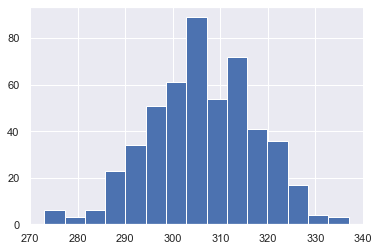

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
fig = plt.hist(depths, bins=15)

In [134]:
ret['estimator'][2].class_weight

In [126]:
ret

{'fit_time': array([0.01067972, 0.01265502, 0.01166987, 0.01065063, 0.00587249]),
 'score_time': array([0.00509834, 0.00788546, 0.00594711, 0.00757289, 0.00130415]),
 'estimator': [DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier(),
  DecisionTreeClassifier()],
 'test_score': array([0.64690038, 0.73720556, 0.68111356, 0.73575741, 0.69728152]),
 'train_score': array([0.99274181, 0.98873487, 0.9895338 , 0.98871347, 0.98953176])}

In [135]:
sigopt.params = dtc__params

In [148]:
for k, v in dtc__params.items():
    print(k,v)

ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_impurity_split None
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best


In [177]:
train_idx, test_idx = gen_train_test(data, 0.75)
# X_train, y_train = ordinal_data.loc[train_idx, :], pd.get_dummies(data['label'].loc[train_idx])
# X_train, y_train = ordinal_data.loc[train_idx, :], data['label'].loc[train_idx]
X_train, y_train = ordinal_data.loc[train_idx, experiment], data['label'].loc[train_idx]
for k,v in dtc__params.items():
    sigopt.params.setdefault(k,v)
# clf = OneVsRestClassifier(model, n_jobs=-1)
with parallel_backend('threading', n_jobs=-1):
    model = RandomForestClassifier(max_features=None,
                                   n_jobs=-1,
                                   min_samples_leaf=1,
                                  random_state=42,)
# cv_results = cross_validate(model, X_train, y_train, scoring='f1_macro', return_train_score=True, n_jobs=-1, cv=n_cv, return_estimator=True)
    model.fit(X_train, y_train)
    cv_results = cross_validate(model, X_train, y_train, scoring='f1_macro', return_train_score=True, n_jobs=-1, cv=10, return_estimator=True)
cv_results
    

{'fit_time': array([0.17336965, 0.10168529, 0.12977386, 0.1595037 , 0.08444548,
        0.12363696, 0.16335058, 0.15592885, 0.08076286, 0.09349442]),
 'score_time': array([0.00447583, 0.07130623, 0.04552937, 0.02211261, 0.01817894,
        0.04955173, 0.00773263, 0.01001453, 0.01860261, 0.00336051]),
 'estimator': [RandomForestClassifier(max_features=None, n_jobs=-1, random_state=42),
  RandomForestClassifier(max_features=None, n_jobs=-1, random_state=42),
  RandomForestClassifier(max_features=None, n_jobs=-1, random_state=42),
  RandomForestClassifier(max_features=None, n_jobs=-1, random_state=42),
  RandomForestClassifier(max_features=None, n_jobs=-1, random_state=42),
  RandomForestClassifier(max_features=None, n_jobs=-1, random_state=42),
  RandomForestClassifier(max_features=None, n_jobs=-1, random_state=42),
  RandomForestClassifier(max_features=None, n_jobs=-1, random_state=42),
  RandomForestClassifier(max_features=None, n_jobs=-1, random_state=42),
  RandomForestClassifier(max

In [164]:
# sklearn.tree.export_graphviz(model,'../data/sigopt_dtc.dot', feature_names=X_train.columns,class_names=['0','1','2'],filled=True,leaves_parallel=True,rounded=True, precision=2)
import matplotlib.pyplot as plt

In [168]:
set(ordinal) - set(['v_31','v_17', 'v_29', 'v_6', 'v_22'])

{'v_0', 'v_10', 'v_13', 'v_15', 'v_19', 'v_23', 'v_24', 'v_33', 'v_5'}

In [169]:
experiment = ['v_0', 'v_10', 'v_13', 'v_15', 'v_19', 'v_23', 'v_24', 'v_33', 'v_5']

In [180]:
experiment_data = ordinal_data.loc[train_idx, experiment]

array([[<AxesSubplot:title={'center':'v_0'}>,
        <AxesSubplot:title={'center':'v_10'}>,
        <AxesSubplot:title={'center':'v_13'}>],
       [<AxesSubplot:title={'center':'v_15'}>,
        <AxesSubplot:title={'center':'v_19'}>,
        <AxesSubplot:title={'center':'v_23'}>],
       [<AxesSubplot:title={'center':'v_24'}>,
        <AxesSubplot:title={'center':'v_33'}>,
        <AxesSubplot:title={'center':'v_5'}>]], dtype=object)

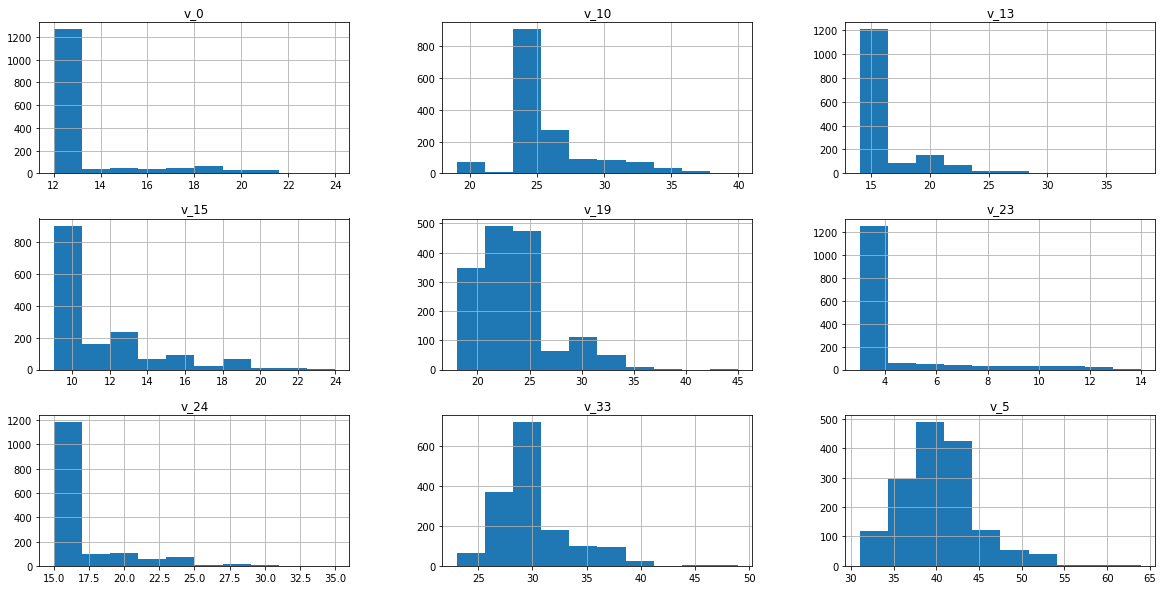

In [182]:
experiment_data.hist(grid=True, figsize=(20,10))

In [1373]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=200,output_distribution='normal', random_state=42)
train_idx, test_idx = gen_train_test(data, 1.0)
X_train, y_train = ordinal_data.loc[train_idx, [ 'v_10', 'v_17', 'v_5', 'v_29', 'v_19', 'v_22', 'v_6']], data['label'].loc[train_idx]
for c in X_train:
    med = X_train[c].median()
    X_train[c] = ((X_train[c])/med)
with parallel_backend('threading', n_jobs=-1):
    model = DecisionTreeClassifier(criterion='entropy',
                                # max_features='sqrt',
                            
                                # learning_rate=0.
                                   # n_jobs=-1,
                                   # min_samples_leaf=1,
                                  random_state=42,)
    model_wf = make_pipeline(qt, model)
    cv_results = cross_validate(model_wf, X_train, y_train, scoring='f1_macro', return_train_score=True, n_jobs=-1, cv=3, return_estimator=True, )
cv_results['test_score'].mean(),cv_results['train_score'].mean()

(0.699674880626504, 0.9757128894860793)

In [1316]:
ordinal_data.loc[:, ['v_0', 'v_24', 'v_13','v_10','v_23', 'v_15']].corr()

,v_0,v_24,v_13,v_10,v_23,v_15
v_0,1.000000,0.476931,0.420507,0.457374,0.627991,0.514703
v_24,0.476931,1.000000,0.796977,0.651720,0.480488,0.382483
v_13,0.420507,0.796977,1.000000,0.641582,0.438588,0.334037
v_10,0.457374,0.651720,0.641582,1.000000,0.446670,0.416958
v_23,0.627991,0.480488,0.438588,0.446670,1.000000,0.519431
v_15,0.514703,0.382483,0.334037,0.416958,0.519431,1.000000


In [1317]:
# sns.heatmap(ordinal_data.corr(method='kendall'))
ordinal_data.corr(method='kendall').loc[:,e[e].index].mean()

v_15    0.298115
v_33    0.488196
v_10    0.480261
v_17    0.369335
v_5     0.377980
v_29    0.351883
v_19    0.452982
v_22    0.355050
v_6     0.435770
dtype: float64

In [1137]:
kendall_ord_vs_label = ordinal_data.corrwith(data.label, method='kendall').sort_values()
# e = (kendall_ord_vs_label>0)
# e[e].index
kendall_ord_vs_label

v_31   -0.164478
v_23   -0.024082
v_24   -0.023771
v_0    -0.020235
v_13   -0.004228
v_15    0.021927
v_33    0.042953
v_10    0.045527
v_17    0.086644
v_5     0.124477
v_29    0.185171
v_19    0.201583
v_22    0.232380
v_6     0.244456
dtype: float64

In [704]:
# set(ordinal) - set(['v_19','v_17', 'v_29', 'v_6', 'v_22'])
ordinal_data.corrwith(data.label, method='kendall').sort_values().index

Index(['v_31', 'v_23', 'v_24', 'v_0', 'v_13', 'v_15', 'v_33', 'v_10', 'v_17',
       'v_5', 'v_29', 'v_19', 'v_22', 'v_6'],
      dtype='object')

In [1060]:
# ['v_15', 'v_33', 'v_10', 'v_17', 'v_5', 'v_29', 'v_19', 'v_22', 'v_6'] Kendall Correlation highest with label
ordinal_data.describe()

,v_31,v_15,v_19,v_13,v_33,v_17,v_29,v_23,v_6,v_24,v_10,v_5,v_22,v_0
count,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000,3796.000000
mean,32.134089,11.609062,23.562171,15.600896,30.127239,50.165701,17.506418,3.975764,13.281876,16.392255,26.064015,39.934932,24.121478,12.998156
std,7.887596,2.576362,3.757691,3.216409,3.256676,4.670733,5.346593,2.249038,3.674661,2.866872,3.079682,4.507494,5.677114,2.309686
min,25.000000,9.000000,18.000000,14.000000,23.000000,41.000000,6.000000,3.000000,8.000000,15.000000,19.000000,31.000000,13.000000,12.000000
25%,27.000000,10.000000,22.000000,14.000000,29.000000,48.000000,17.200000,3.000000,11.000000,15.000000,25.000000,37.000000,24.000000,12.000000
50%,29.000000,10.000000,24.000000,14.000000,29.000000,49.000000,18.571429,3.000000,13.000000,15.000000,25.000000,39.000000,25.500000,12.000000
75%,35.000000,12.000000,25.000000,16.000000,31.000000,53.000000,20.000000,3.000000,15.000000,16.000000,27.000000,42.000000,27.000000,12.000000
max,78.000000,25.000000,45.000000,38.000000,49.000000,86.000000,31.111111,17.000000,28.000000,37.000000,42.000000,64.000000,38.000000,26.000000


In [1124]:
nom_dum = pd.get_dummies(data.loc[:, nominal], columns=nominal)

In [1125]:
# nom_dum.drop(nominal,axis=1,inplace=True)
nom_dum.columns

Index(['v_32_6', 'v_32_7', 'v_32_8', 'v_32_9', 'v_32_10', 'v_32_11', 'v_32_12',
       'v_32_13', 'v_32_14', 'v_32_15',
       ...
       'v_12_137', 'v_12_138', 'v_12_139', 'v_12_145', 'v_12_160', 'v_12_162',
       'v_12_168', 'v_12_172', 'v_12_177', 'v_12_179'],
      dtype='object', length=638)

In [1139]:
# kendall_nom_v_label = nom_dum.corrwith(data.label, method='kendall')
# kendall_nom_v_label[kendall_nom_v_label>0.01].sort_values()
# nom_kendal_valid = kendall_nom_v_label[kendall_nom_v_label>0.01].sort_values().index

In [1409]:
# nom_dum_legit_corr = nom_dum.loc[:,nom_kendal_valid].corr(method='kendall')
nom_dum_legit_corr = nom_dum.corr(method='kendall')

In [1416]:
f = ((nom_dum_legit_corr < -0.01).sum(axis=0) > 160)
e2 = f[f].index

In [1417]:
nom_dum.loc[:,e2].corrwith(data.label, method='kendall')
nom_dum.loc[:,e2].corrwith(data.label)

v_32_6      0.108981
v_32_89     0.037825
v_32_116   -0.150650
v_32_147    0.004436
v_32_157    0.046438
v_4_17     -0.012248
v_4_20     -0.027573
v_4_52     -0.008506
v_4_54      0.017372
v_4_55      0.032969
v_4_96      0.035157
v_4_100     0.033366
v_4_102    -0.026951
v_4_121     0.070584
v_4_148    -0.026496
v_4_155    -0.033378
v_4_158    -0.005966
v_4_167    -0.052821
v_3_5      -0.118238
v_3_17      0.012298
v_3_31      0.007281
v_3_39     -0.004049
v_3_44      0.019409
v_3_45      0.038434
v_3_70      0.013595
v_3_79      0.004774
v_3_87      0.002805
v_3_104     0.026746
v_20_6      0.028593
v_20_60     0.007392
v_20_168    0.055542
v_20_251   -0.036510
v_20_278    0.027449
v_21_3      0.068640
v_21_4     -0.061971
v_18_3     -0.134429
v_18_11     0.017965
v_18_12     0.022032
v_18_23     0.015617
v_18_30     0.018323
v_18_38     0.011168
v_18_103    0.008756
v_25_1      0.031011
v_25_5      0.021003
v_25_110    0.050400
v_25_165   -0.137587
v_25_181   -0.044316
v_25_183    0

In [3]:
dtc = RandomForestClassifier(criterion='gini', random_state=42)

In [5]:
train_idx, test_idx = gen_train_test(data, 0.75)
# X_train, y_train = nom_dum.loc[train_idx,:], data['label'].loc[train_idx]
X_train, y_train = nominal_data.loc[train_idx,:].astype('category'), data['label'].loc[train_idx]
X_test, y_test = nominal_data.loc[test_idx,:].astype('category'), data["label"].loc[test_idx]
# X_train, y_train = nominal_data.loc[train_idx,:], data['label'].loc[train_idx]
# X_train, y_train = nom_dum.iloc[train_idx,imp_nom], data['label'].loc[train_idx]
# cv_results = cross_validate(dtc, X_train, y_train, scoring='f1_macro', return_train_score=True, n_jobs=-1, cv=10, return_estimator=True, )
# cv_results

{'fit_time': array([0.14069819, 0.13676572, 0.14937949, 0.14447856, 0.09823632,
        0.15595841, 0.135391  , 0.15466595, 0.12151432, 0.12056446]),
 'score_time': array([0.00430202, 0.0066185 , 0.00564098, 0.02986598, 0.00554204,
        0.00778198, 0.00798416, 0.00675464, 0.0118072 , 0.00685859]),
 'estimator': [RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42)],
 'test_score': array([0.65279291, 0.66159978, 0.5947116 , 0.72323131, 0.6745203 ,
        0.69382614, 0.6381798 , 0.62606354, 0.58700523, 0.6462607 ]),
 'train_score': array([0.98494384, 0.98209191, 0.98280332, 0.98280873, 0.98424467,
        0.98352941,

In [ ]:
from autosklearn.automl import AutoMLClassifier
automl = AutoMLClassifier(time_left_for_this_task=3600, per_run_time_limit=60,n_jobs=-1,precision=64,ensemble_size=100, ensemble_nbest=100, max_models_on_disc=500, temporary_directory='../data/automl5', delete_tmp_folder_after_terminate=False,seed=50, initial_configurations_via_metalearning=500)
automl.fit(X_train,y_train,X_test=X_test,y_test=y_test,dataset_name='nominal_data')


with open('../data/automl_clf.pkl', 'wb') as fp:
    pickle.dump(automl, fp)

In [20]:
automl.get_models_with_weights()

[(0.12,
  SimpleClassificationPipeline({'balancing:strategy': 'none', 'classifier:__choice__': 'gradient_boosting', 'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'feature_agglomeration', 'classifier:gradient_boosting:early_stop': 'off', 'classifier:gradient_boosting:l2_regularization': 1.1509514015236061e-10, 'classifier:gradient_boosting:learning_rate': 0.0746859361006727, 'classifier:gradient_boosting:loss': 'auto', 'classifier:gradient_boosting:max_bins': 255, 'classifier:gradient_boosting:max_depth': 'None', 'classifier:gradient_boosting:max_leaf_nodes': 191, 'classifier:gradient_boosting:min_samples_leaf': 15, 'classifier:gradient_boosting:scoring': 'loss', 'classifier:gradient_boosting:tol': 1e-07, 'data_preprocessor:feature_type:categorical_transformer:categorical_encoding:__choice__': 'no_encoding', 'data_preprocessor:feature_type:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessor:feature_type: